## Libraries & Dataset

First, we need to load a few libraries:

- [seaborn](/seaborn) for the heatmap
- [matplotlib](/matplotlib) for chart customization
- [pandas](/pandas) for data manipulation
- `numpy` for data generation


In [1]:
# library
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
# Create a dataset
df = pd.DataFrame(
    np.random.random((5,5)),
    columns=["a","b","c","d","e"]
)

## Wide Format (Untidy)

The **wide format** (or the **untidy format**) is a matrix where each row is an individual, and each column is an observation. In this case, the heatmap makes a visual representation of the matrix: each square of the heatmap represents a cell. The color of the cell changes according to its value.

In order to draw a heatmap with a wide format dataset, you can use the `heatmap()` function of seaborn.


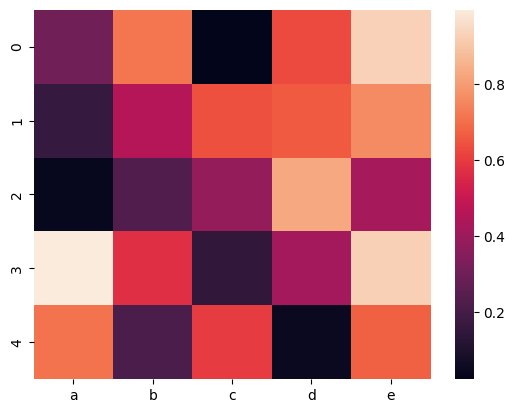

In [2]:
# Default heatmap: just a visualization of this square matrix
sns.heatmap(df)
plt.show()

## Correlation Matrix (Square)


Suppose you measured **several variables** for **n individuals**. A common task is to check if some variables are **correlated**. You can easily calculate the correlation between each pair of variable, and plot this as a **heatmap**. This lets you discover which variable is related to the other.

As a difference from the previous example, you will give a correlation matrix as an input instead of a wide format data.


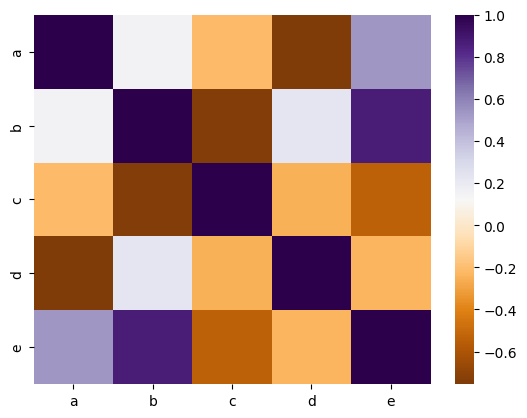

In [3]:
# Calculate correlation between each pair of variable
corr_matrix=df.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='PuOr')
plt.show()

Note that in this case, both correlations (i.e. from a to b and from b to a) will appear in the heatmap. You might want to plot a half of the heatmap using `mask` argument like this example:


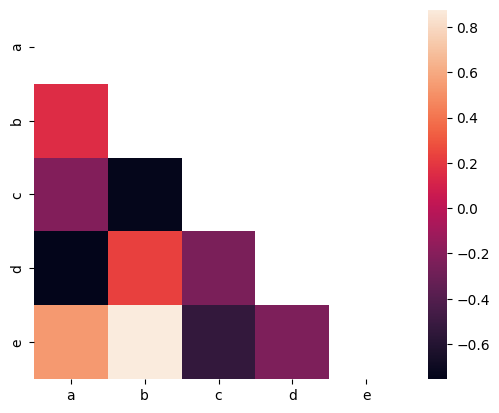

In [4]:
# Calculate correlation between each pair of variable
corr_matrix=df.corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, square=True)
plt.show()

## Long Format (Tidy)


In the **tidy** or **long** format, each line represents an observation. You have 3 columns: individual, variable name, and value (x, y and z). You can plot a heatmap from this kind of data as follow:


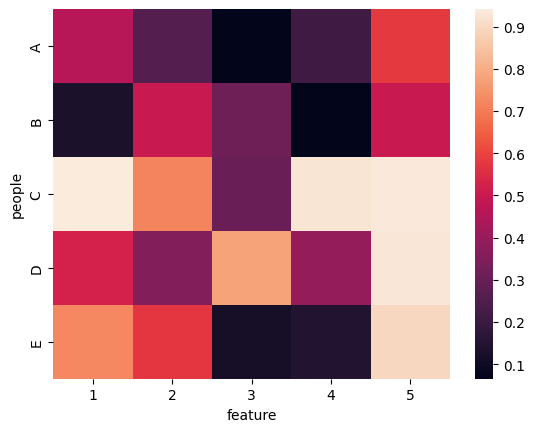

In [5]:
# Create long format
df = pd.DataFrame({
    'feature': list(range(1,6))*5,
    'people': np.repeat(("A","B","C","D","E"),5),
    'value': np.random.random(25)
})

# Turn long format into a wide format
df_wide = df.pivot_table(
    index='people',
    columns='feature',
    values='value'
)

# plot it
sns.heatmap(df_wide)
plt.show()

## Going further

This post explains how to create a [heatmap](/heatmap) with [matplotlib](/matplotlib) and [seaborn](/seaborn).

You might be interested by:

- how to [customize heatmaps](/91-customize-seaborn-heatmap)
- how to [control colors in heatmap](/92-control-color-in-seaborn-heatmaps)
- use heatmap with [clustering and dendograms](/405-dendrogram-with-heatmap-and-coloured-leaves)
